In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from pytesseract import image_to_string
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import pytesseract
import cv2
import os
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score

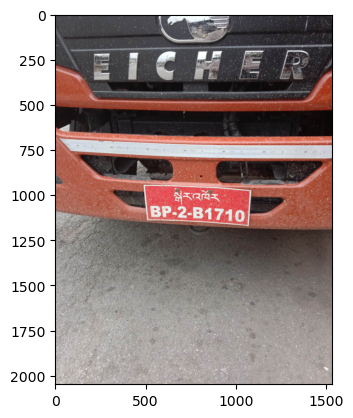

In [42]:
img = image.load_img("basedata/train/train_data/801.jpg")
plt.imshow(img)

In [43]:
#to see three dimesion of image use cv2

cv2.imread("basedata/train/train_data/801.jpg")
# value of rgb ranges from 0 to 82 so to want ranges from 0 to 1 i will divide every single element by 82 

array([[[ 82,  80,  80],
        [ 82,  80,  80],
        [ 81,  79,  79],
        ...,
        [ 51,  48,  50],
        [ 47,  44,  46],
        [ 44,  41,  43]],

       [[ 81,  79,  79],
        [ 81,  79,  79],
        [ 81,  79,  79],
        ...,
        [ 46,  43,  45],
        [ 47,  44,  46],
        [ 49,  46,  48]],

       [[ 80,  78,  78],
        [ 80,  78,  78],
        [ 80,  78,  78],
        ...,
        [ 43,  40,  42],
        [ 47,  44,  46],
        [ 54,  51,  53]],

       ...,

       [[182, 185, 193],
        [180, 183, 191],
        [179, 182, 190],
        ...,
        [176, 182, 189],
        [173, 179, 186],
        [170, 176, 183]],

       [[179, 182, 190],
        [178, 181, 189],
        [177, 180, 188],
        ...,
        [174, 180, 187],
        [171, 177, 184],
        [169, 175, 182]],

       [[178, 181, 189],
        [177, 180, 188],
        [177, 180, 188],
        ...,
        [172, 178, 185],
        [169, 175, 182],
        [167, 173, 180]]

In [44]:
# to see shape of the image
# 2048 as pixels height and 1536 as width and 3 as rbg
cv2.imread("basedata/train/train_data/801.jpg").shape

(2048, 1536, 3)

In [45]:
# generate training data and validate data with the help of imagedatagenerate
train = ImageDataGenerator(rescale = 1./255 )
validation = ImageDataGenerator(rescale= 1./255)

In [46]:
# to convert your training image to dataset  that can be feeded to neurons network
# for generating label fir directory we need to mention flow
# target_size will also help to resize the image 
train_dataset = train.flow_from_directory('basedata/train/',
                                          target_size = (200,200),
                                          batch_size = 20,
                                          class_mode = 'binary'
                                          )
validation_dataset = train.flow_from_directory('basedata/validate/',
                                          target_size = (200,200),
                                          batch_size = 5,
                                          class_mode = 'binary'
                                          )

Found 56 images belonging to 2 classes.
Found 26 images belonging to 1 classes.


In [47]:
# if you want to see labels and data generate with this function do 
train_dataset.class_indices

{'output': 0, 'train_data': 1}

In [48]:
# have to define model using cnn with max pooling and all layer are given in the form of list
Vehicle_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ## apply dense layer and check no of channel
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])


In [49]:
Vehicle_model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.01),
             metrics = ['accuracy']
             )

In [50]:
# eppoch is how many iteration you want to have and callback to stop the iteration
Vehicle_model_fit = Vehicle_model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 10,
                      validation_data = validation_dataset
                      
                     )


Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 0.2180 - accuracy: 0.7143 - val_loss: 9112.0273 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9112.0273 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9112.0283 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9112.0273 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9112.0273 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9112.0273 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9112.

In [51]:
#saving model
Vehicle_model.save('vmmodel.h5')

In [52]:
from sklearn.metrics import roc_auc_score
from keras.models import load_model
vehicle_model = load_model('vmmodel.h5')
     

In [53]:
import pytesseract
from PIL import Image
from pytesseract import image_to_string

In [54]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [55]:
model = tf.keras.models.load_model('C:/Users/tsher/OneDrive/Desktop/prj/vmmodel.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [56]:
path = './basedata/test/818.jpg'
image = load_img(path)
# 8 bit array (0,255)
image = np.array(image,dtype=np.uint8)
image1 = load_img(path,target_size=(200,200))

# convert into array and get the normalized output
image_arr_224 = img_to_array(image1)/255.0  

In [57]:
image.shape


(2048, 1536, 3)

In [58]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 2048
Width of the image = 1536


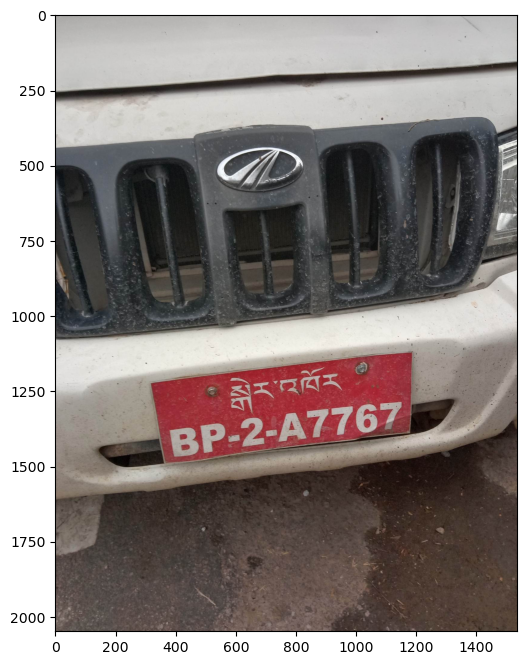

In [59]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [60]:
image_arr_224.shape

(200, 200, 3)

In [61]:
test_arr = image_arr_224.reshape(1,200,200,3)
test_arr.shape

(1, 200, 200, 3)

In [62]:
result = model.predict(test_arr)
result

1/1 [==============================] - 0s 189ms/step


array([[1.]], dtype=float32)

In [63]:
# denormalize the values
denorm = np.array([w,w,h,h])
result = result * denorm
result

array([[1536., 1536., 2048., 2048.]])

In [64]:
result = result.astype(np.int32)
result

array([[1536, 1536, 2048, 2048]])

(1536, 2048) (1536, 2048)


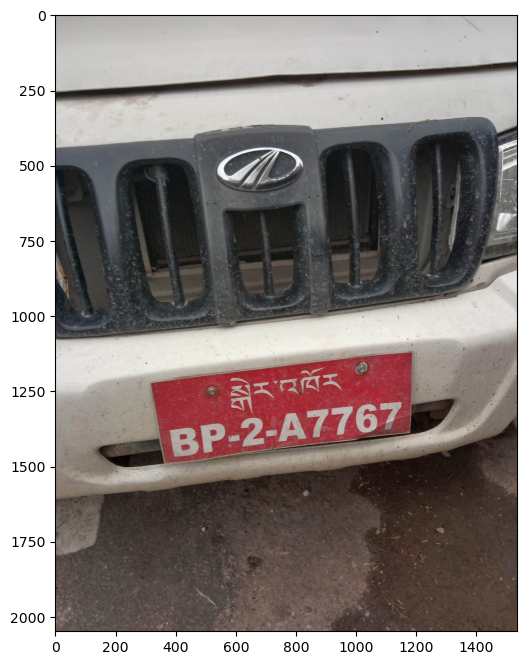

In [65]:
# draw bounding on top the image
xmin,xmax,ymin,ymax = result[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [66]:
#create pipeline
path = './basedata/test/818.jpg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(200,200))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,200,200,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords


1/1 [==============================] - 0s 96ms/step
(1536, 2048) (1536, 2048)


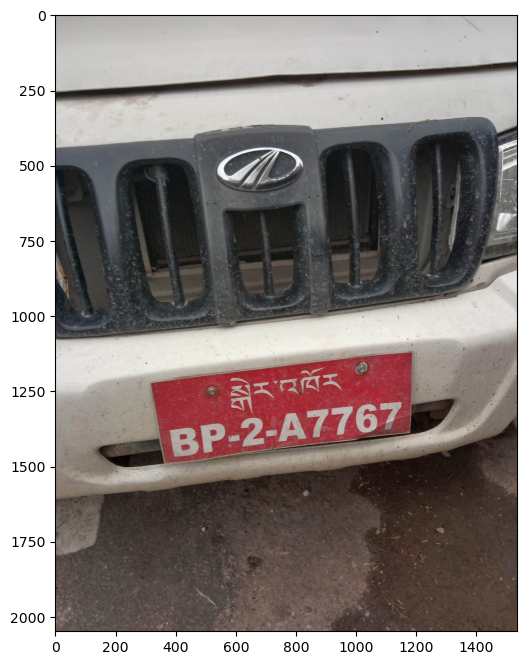

In [67]:
path = './basedata/test/818.jpg'
image, coords = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 79ms/step
(1536, 2048) (1536, 2048)


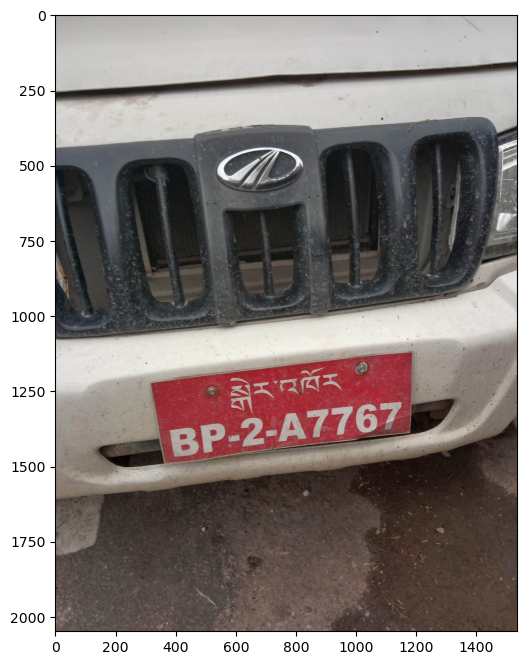

In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


from PIL import Image

path = './basedata/test/818.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

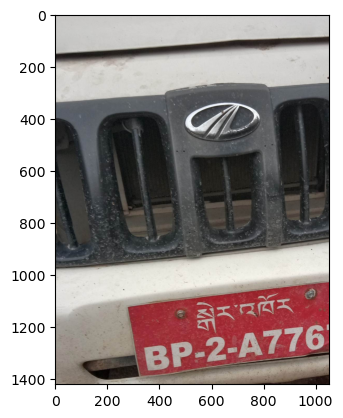

In [69]:
img = np.array(load_img(path))
x, y, w, h = 40, 100, 1050, 1420  # Example values, adjust to your image
roi = img[y:y+h, x:x+w]
plt.imshow(roi)
plt.show()

In [70]:
import pytesseract  as tess
tess.pytesseract.tesseract_cmd = r'C:/Users/tsher/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'

# Preprocess the ROI
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


# Apply pytesseract OCR to the ROI
text = tess.image_to_string(gray, config='--psm 11')

# Print the extracted text
print("License Plate Number:", text.strip())

License Plate Number: CG

Rae as

BP-2

-A776
